In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2010-01-01'
end = '2024-04-25'
stock = 'BTC-USD'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3503,2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853
3505,2024-04-22,64935.632812,67233.960938,64548.179688,66837.679688,66837.679688,28282686673
3506,2024-04-23,66839.890625,67199.242188,65864.867188,66407.273438,66407.273438,24310975583


In [8]:
ma_100_days = data.Close.rolling(100).mean()

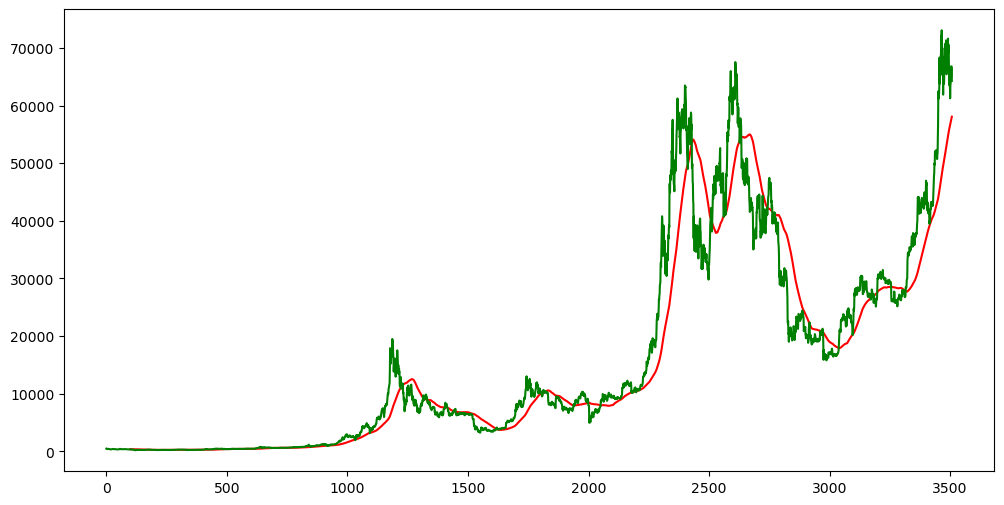

In [9]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

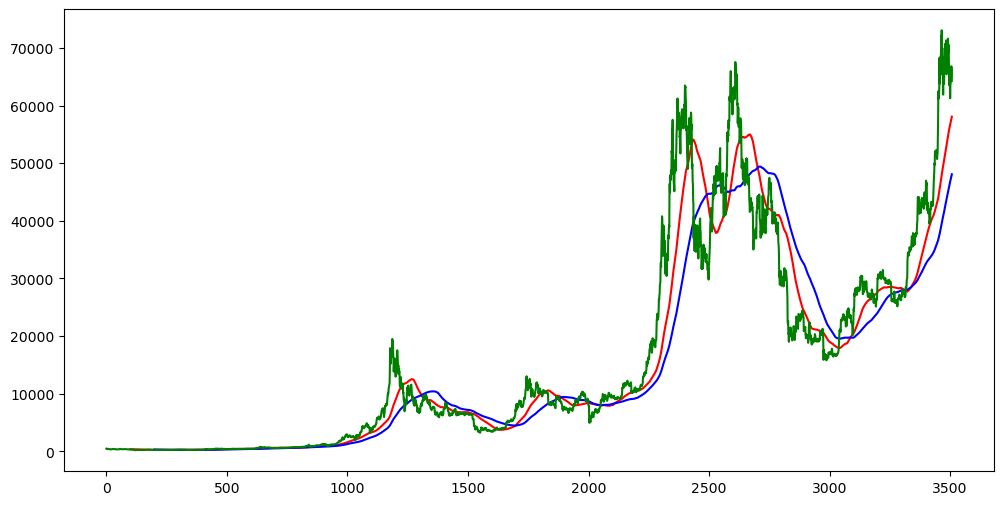

In [11]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
# Splitting data into training and testing data
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.70)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.70): len(data)])

In [14]:
data_train.shape[0]

2455

In [15]:
data_test.shape[0]

1053

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)
data_train_scale

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.57980415],
       [0.55860492],
       [0.56350693]])

In [18]:
data_train_scale.shape

(2455, 1)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
# Machine Learning Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - loss: 0.0247
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0040
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - loss: 0.0030
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 0.0028
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0029
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 0.0026
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0028
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0021
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0023
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0034
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0024
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0030
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0021
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0022
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [28]:
data_test_scale  =  scaler.fit_transform(data_test)

In [29]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


In [31]:
scale =1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

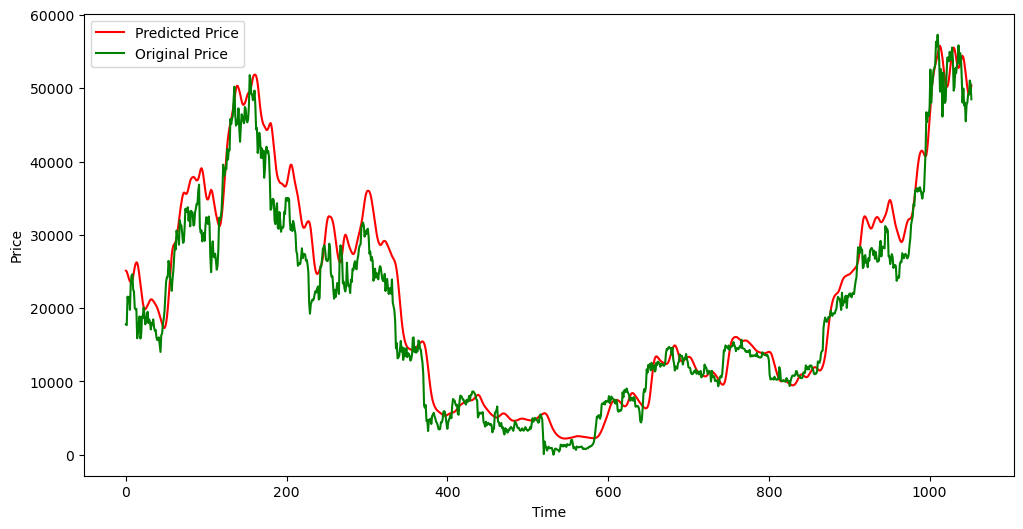

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
model.save('Bitcoin Prediction Model.keras')